In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#https://pandas-xlsxwriter-charts.readthedocs.io/
#https://xlsxwriter.readthedocs.io/example_pandas_chart.html


# Load and Transform Data

In [93]:
file_path='fin_data/SPY_Indy_Y16-Now.csv'
folder_name,file_name = os.path.split(file_path)
result_path=f'{folder_name}/Report-{os.path.splitext(file_name)[0]}.xlsx'

print(file_name)
print(result_path)

start_x='01-2016'
end_x='12-2023'

SPY_Indy_Y16-Now.csv
fin_data/Report-SPY_Indy_Y16-Now.xlsx


In [94]:

df=pd.read_csv(file_path,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
print(list(df.columns))
df=df['01-2016':'12-2023']
print(df.info())
print(df.head())

no_threshold=5
lookback=1

['Ticker', 'Price', 'EMA1', 'EMA2', 'EMA3', 'MACD', 'SIGNAL', 'RSI', 'RSI-MA']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1793 entries, 2016-01-04 to 2023-02-15
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1793 non-null   object 
 1   Price   1793 non-null   float64
 2   EMA1    1793 non-null   float64
 3   EMA2    1793 non-null   float64
 4   EMA3    1793 non-null   float64
 5   MACD    1793 non-null   float64
 6   SIGNAL  1793 non-null   float64
 7   RSI     1793 non-null   float64
 8   RSI-MA  1793 non-null   float64
dtypes: float64(8), object(1)
memory usage: 140.1+ KB
None
           Ticker   Price    EMA1    EMA2    EMA3  MACD  SIGNAL    RSI  RSI-MA
Date/Time                                                                     
2016-01-04    QQQ  109.50  112.04  112.37  112.37 -0.33   -0.10  40.84   49.31
2016-01-05    QQQ  109.31  111.54  112.08  112.08 -0.54   -0.15  40.35   47.35
2016-01-06    Q

In [95]:
colSumSince='SIGNAL'
#colSumSince='Signal10_20_15'
# def create_trend_feature(df,colSumSince):


In [96]:
df=df.reset_index(drop=False)
df_date=df[['Date/Time']]
df=df[[colSumSince]]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SIGNAL  1793 non-null   float64
dtypes: float64(1)
memory usage: 14.1 KB


,SIGNAL
0,-0.10
1,-0.15
2,-0.23
3,-0.35
4,-0.51


# Sum and Count Trend

In [97]:
colUp=f'{colSumSince}_UpSum'
colUpCount=f'{colSumSince}_UpCount'
colDown=f'{colSumSince}_DownSum'
colDownCount=f'{colSumSince}_DownCount'

def find_sum_trend(lookback=1,trendID=1):  # 1=up 0=down
  sumsinceList=[]
  countList=[]
  sum_x=0
  for i in range(0, len(df)):
        if i<lookback:
            sumsinceList.append(0)
            countList.append(0)
        elif i>=lookback:
          logic= df.loc[i,colSumSince] > df.loc[i-lookback,colSumSince] if trendID==1 else df.loc[i,colSumSince] <= df.loc[i-lookback,colSumSince]
          if logic:
             sum_x=sum_x+1
             sumsinceList.append(sum_x)  
             countList.append(1)
          else:
            sum_x=0
            sumsinceList.append(0)   
            countList.append(0)  
  return sumsinceList,countList


# Wait implemet
# def find_sum_and_pct_trend(lookback=1,trendID=1):  # 1=up 0=down
#   sumsinceList=[]
#   countList=[]
#   sum_x=0
#   for i in range(0, len(df)):
#         if i<lookback:
#             sumsinceList.append(0)
#             countList.append(0)
#         elif i>=lookback:
#           logic= df.loc[i,colSumSince] > df.loc[i-lookback,colSumSince] if trendID==1 else df.loc[i,colSumSince] <= df.loc[i-lookback,colSumSince]
#           if logic:
#              sum_x=sum_x+1
#              sumsinceList.append(sum_x)  
#              countList.append(1)
#           else:
#             sum_x=0
#             sumsinceList.append(0)   
#             countList.append(0)  
#   return sumsinceList,countList


In [98]:
sum_up,count_up= find_sum_trend(lookback=lookback,trendID=1)
sumUpDF=pd.DataFrame ( {colUp:sum_up,colUpCount:count_up})
sumUpDF

,SIGNAL_UpSum,SIGNAL_UpCount
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1788,23,1
1789,24,1
1790,25,1
1791,26,1


In [99]:
sum_down,count_down=find_sum_trend(lookback=lookback,trendID=0)
sumDownDF=pd.DataFrame ( {colDown:sum_down,colDownCount:count_down})
sumDownDF

,SIGNAL_DownSum,SIGNAL_DownCount
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
1788,0,0
1789,0,0
1790,0,0
1791,0,0


In [100]:
df_x=pd.concat([df_date,df,sumUpDF,sumDownDF],axis=1)
df_x.set_index('Date/Time',inplace=True)
print(df_x.info())

# df_x.to_csv("X.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1793 entries, 2016-01-04 to 2023-02-15
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SIGNAL            1793 non-null   float64
 1   SIGNAL_UpSum      1793 non-null   int64  
 2   SIGNAL_UpCount    1793 non-null   int64  
 3   SIGNAL_DownSum    1793 non-null   int64  
 4   SIGNAL_DownCount  1793 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 84.0 KB
None


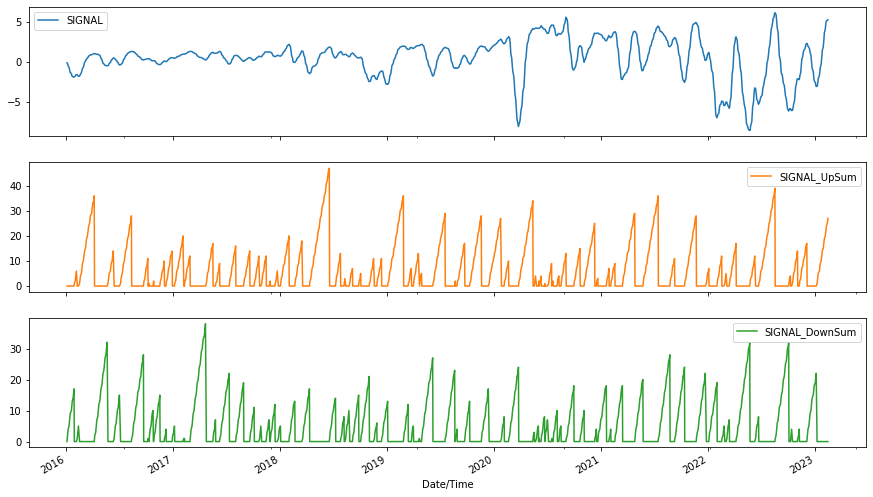

In [101]:
dfPlot=df_x[[colSumSince,colUp,colDown]]

colToPlots=dfPlot[[colSumSince,colUp,colDown]].columns

dfPlot.plot(kind='line',layout=(len(colToPlots),1),
                      subplots=True,figsize=(15, 3*len(colToPlots)))
   
plt.show()

# Group Trend to find distrubution

In [102]:
df_x.reset_index(drop=False,inplace=True)
df_x.rename(columns={"Date/Time":"Date"},inplace=True)


# filter only uptrend to group count
dfUp=df_x.query(f"{colUp}>0").reset_index(drop=True).loc[:,['Date',colUp]]



# filter only downtrend to group count
dfDown=df_x.query(f"{colDown}>0").reset_index(drop=True).loc[:,['Date',colDown]]


In [103]:
def group_trend(dfGroup,colTrend):  # Up=up Down=down  and grou
  groupList=[]
  group_name=''
  for i in range(0, len(dfGroup)):
    if i==0:
      group_name=dfGroup.loc[i,'Date'].strftime("%d%b%y")  
      groupList.append(group_name)  
    else:
       if dfGroup.loc[i,colTrend]> dfGroup.loc[i-1,colTrend]:
         groupList.append(group_name) 
       else:
         group_name=dfGroup.loc[i,'Date'].strftime("%d%b%y")  
         groupList.append(group_name)  
         
  return groupList


In [104]:
colGroupUp='Up'
groupUp=group_trend(dfUp,colUp)
dfUp=pd.concat([dfUp,pd.DataFrame({colGroupUp:groupUp})],axis=1)
print(dfUp.info())
print(dfUp)

#trend_range=[0, 2,3, 5, 10, 15, 20,25,30]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          942 non-null    datetime64[ns]
 1   SIGNAL_UpSum  942 non-null    int64         
 2   Up            942 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.2+ KB
None
          Date  SIGNAL_UpSum       Up
0   2016-01-29             1  29Jan16
1   2016-02-01             2  29Jan16
2   2016-02-02             3  29Jan16
3   2016-02-03             4  29Jan16
4   2016-02-04             5  29Jan16
..         ...           ...      ...
937 2023-02-09            23  09Jan23
938 2023-02-10            24  09Jan23
939 2023-02-13            25  09Jan23
940 2023-02-14            26  09Jan23
941 2023-02-15            27  09Jan23

[942 rows x 3 columns]


In [107]:
dfUpGroupX=dfUp.groupby([colGroupUp])[[colUp]].max()
dfUpGroupX=dfUpGroupX.query(f"{colUp}>=@no_threshold")
dfUpGroupX=dfUpGroupX.sort_values(by=colUp,ascending=False)
# dfUpGroupX['TrendRange'] = pd.cut(dfUpGroupX[colUp], bins=4, labels=False)
# print(len(dfUpGroupX))
dfUpGroupX




,SIGNAL_UpSum
Up,
12Apr18,47
24Jun22,39
16Feb16,36
25May21,36
04Jan19,36
26Mar20,34
16Mar21,29
07Jun19,29
11Oct19,28


In [108]:
colGroupDown='Down'
groupDown=group_trend(dfDown,colDown)
dfDown=pd.concat([dfDown,pd.DataFrame({colGroupDown:groupDown})],axis=1)
print(dfDown.info())
print(dfDown)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            850 non-null    datetime64[ns]
 1   SIGNAL_DownSum  850 non-null    int64         
 2   Down            850 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 20.0+ KB
None
          Date  SIGNAL_DownSum     Down
0   2016-01-05               1  05Jan16
1   2016-01-06               2  05Jan16
2   2016-01-07               3  05Jan16
3   2016-01-08               4  05Jan16
4   2016-01-11               5  05Jan16
..         ...             ...      ...
845 2022-12-30              18  06Dec22
846 2023-01-03              19  06Dec22
847 2023-01-04              20  06Dec22
848 2023-01-05              21  06Dec22
849 2023-01-06              22  06Dec22

[850 rows x 3 columns]


In [109]:
dfDownGroupX=dfDown.groupby([colGroupDown])[[colDown]].max()
dfDownGroupX=dfDownGroupX.query(f"{colDown}>=@no_threshold")
dfDownGroupX=dfDownGroupX.sort_values(by=colDown,ascending=False)

dfDownGroupX

,SIGNAL_DownSum
Down,
28Feb17,38
19Aug22,32
07Apr16,32
08Apr22,32
16Jul21,28
12Aug16,28
30Apr19,27
21Feb20,24
10Sep21,24


<AxesSubplot:ylabel='Frequency'>

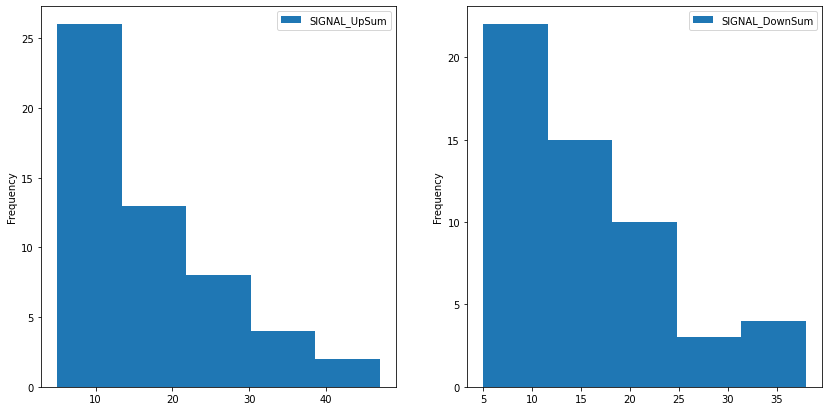

In [111]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(14,7))
dfUpGroupX.plot.hist(ax=ax1,bins=5)
dfDownGroupX.plot.hist(ax=ax2,bins=5)

In [27]:
#return  df_x,dfUpGroupX,dfDownGroupX

In [28]:
# writer=pd.ExcelWriter(result_path,engine='xlsxwriter') 

# df_x.to_excel(writer, sheet_name="All-Trend",index=False)
# dfUp.to_excel(writer,sheet_name="UpTrend",index=False)
# dfUpGroupX.to_excel(writer,sheet_name="UpSummary",index=True)
# dfDown.to_excel(writer,sheet_name="DownTrend",index=False)
# dfDownGroupX.to_excel(writer,sheet_name="DownSummary",index=True)
# writer.save()